# Convolution

Conv2d takes in 5 parameters:

```in_channels``` that tells how many channels does the constructor take in

```out_channels``` that tells how many channels does the constructor returns from each input channel

```kernel_size``` that defines the size of the kernel that convolves the image

```stride``` that defines if the kernel goes 1 by 1 or has jumps

```padding``` that adds an outer border on the image in the case you don't want the output to shrink

$$M_{new}=\dfrac{M+2 \times padding -K}{stride}+1$$

In [78]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [79]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [80]:
# Initialize the weights, they are randomly initialized, but you can set them up

conv.state_dict()['weight'][0][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])


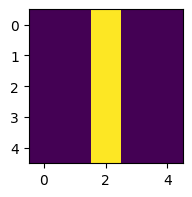

In [81]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
print(image)
plt.figure(figsize=(2,2))
plt.imshow(image[0, 0])

In [82]:
z=conv(image)
z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)

The size of the output is an important parameter. In this lab, you will assume square images. For rectangular images, the same formula can be used in for each dimension independently.  

Let M be the size of the input and K be the size of the kernel. The size of the output is given by the following formula:


$$M_{new}=M-K+1$$

In [83]:
K=2
conv1 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=K)
conv1.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv1.state_dict()['bias'][0]=0.0
conv1.state_dict()
print(conv1)

M=4
image1=torch.ones(1,1,M,M)

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))


Output size:

$$M_{new}=M-K+1$$
$$M_{new}=4-2+1$$
$$M_{new}=3$$

In [84]:
z1=conv1(image1)
print("z1:",z1)
print("shape:",z1.shape[2:4])

z1: tensor([[[[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape: torch.Size([3, 3])


# Stride

The parameter stride changes the number of shifts the kernel moves per iteration. As a result, the output size also changes and is given by the following formula:

$$M_{new}=\dfrac{M-K}{stride}+1$$


In [85]:
conv3 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=2)

conv3.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv3.state_dict()['bias'][0]=0.0
conv3.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

For an image with a size of 4, calculate the output size:

$$M_{new}=\dfrac{M-K}{stride}+1$$
$$M_{new}=\dfrac{4-2}{2}+1$$
$$M_{new}=2$$


In [86]:
z3=conv3(image1)

print("z3:",z3)
print("shape:",z3.shape[2:4])

z3: tensor([[[[4., 4.],
          [4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape: torch.Size([2, 2])


# Padding

$$M'=M+2 \times padding$$
$$M_{new}=M'-K+1$$


In [87]:
print(image1)

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])


In [88]:
conv4 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv4.state_dict()['bias'][0]=0.0
conv4.state_dict()
z4=conv4(image1)
print("z4:",z4)
print("z4:",z4.shape[2:4])

z4: tensor([[[[4.]]]], grad_fn=<ConvolutionBackward0>)
z4: torch.Size([1, 1])


In [89]:
conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3,padding=1)

conv5.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv5.state_dict()['bias'][0]=0.0
conv5.state_dict()
z5=conv5(image1)
print("z5:",z5)
print("z5:",z4.shape[2:4])

z5: tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<ConvolutionBackward0>)
z5: torch.Size([1, 1])
